In [4]:
import warnings
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, fetch_openml,load_iris,fetch_california_housing
from sklearn.feature_selection import mutual_info_regression, f_regression, RFE, SelectFromModel, SelectKBest, f_classif
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import (
RepeatedStratifiedKFold, 
cross_val_score, 
train_test_split, 
GridSearchCV,
cross_val_predict, 
learning_curve, 
validation_curve)
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error,zero_one_loss, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from os.path import join as pjoin
#sharper plots
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
from sklearn.linear_model import (LogisticRegression, LogisticRegressionCV,
                                  SGDClassifier)
from PIL import Image
import random
warnings.filterwarnings("ignore")
from shutil import copyfile
from sklearn.svm import SVC

In [ ]:
#data_path = r"C:\Users\Acer\Desktop\spbu_ml_2025\data\prices_test.csv"
data_path = r"/Users/yuki/Documents/GitHub/ml_2025/data/prices_test.csv"
df = pd.read_csv(data_path)
df = df.drop['']
df


,Unnamed: 0,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0,2012.833,3.4,NaN,NaN,24.95744,121.53711
1,1,2013.083,34.8,405.21340,1.0,24.97349,121.53372
2,2,2013.500,4.1,2147.37600,3.0,24.96299,121.51284
3,3,2012.917,18.9,1009.23500,0.0,24.96357,121.54951
4,4,2013.417,3.9,2147.37600,3.0,24.96299,121.51284
...,...,...,...,...,...,...,...
78,78,2013.167,21.3,537.79710,4.0,24.97425,121.53814
79,79,2012.917,9.9,279.17260,NaN,24.97528,121.54541
80,80,2013.417,10.5,279.17260,7.0,24.97528,121.54541
81,81,2013.250,17.8,NaN,3.0,24.96731,121.51486


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              83 non-null     int64  
 1   X1 transaction date                     83 non-null     float64
 2   X2 house age                            83 non-null     float64
 3   X3 distance to the nearest MRT station  78 non-null     float64
 4   X4 number of convenience stores         76 non-null     float64
 5   X5 latitude                             83 non-null     float64
 6   X6 longitude                            83 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 4.7 KB


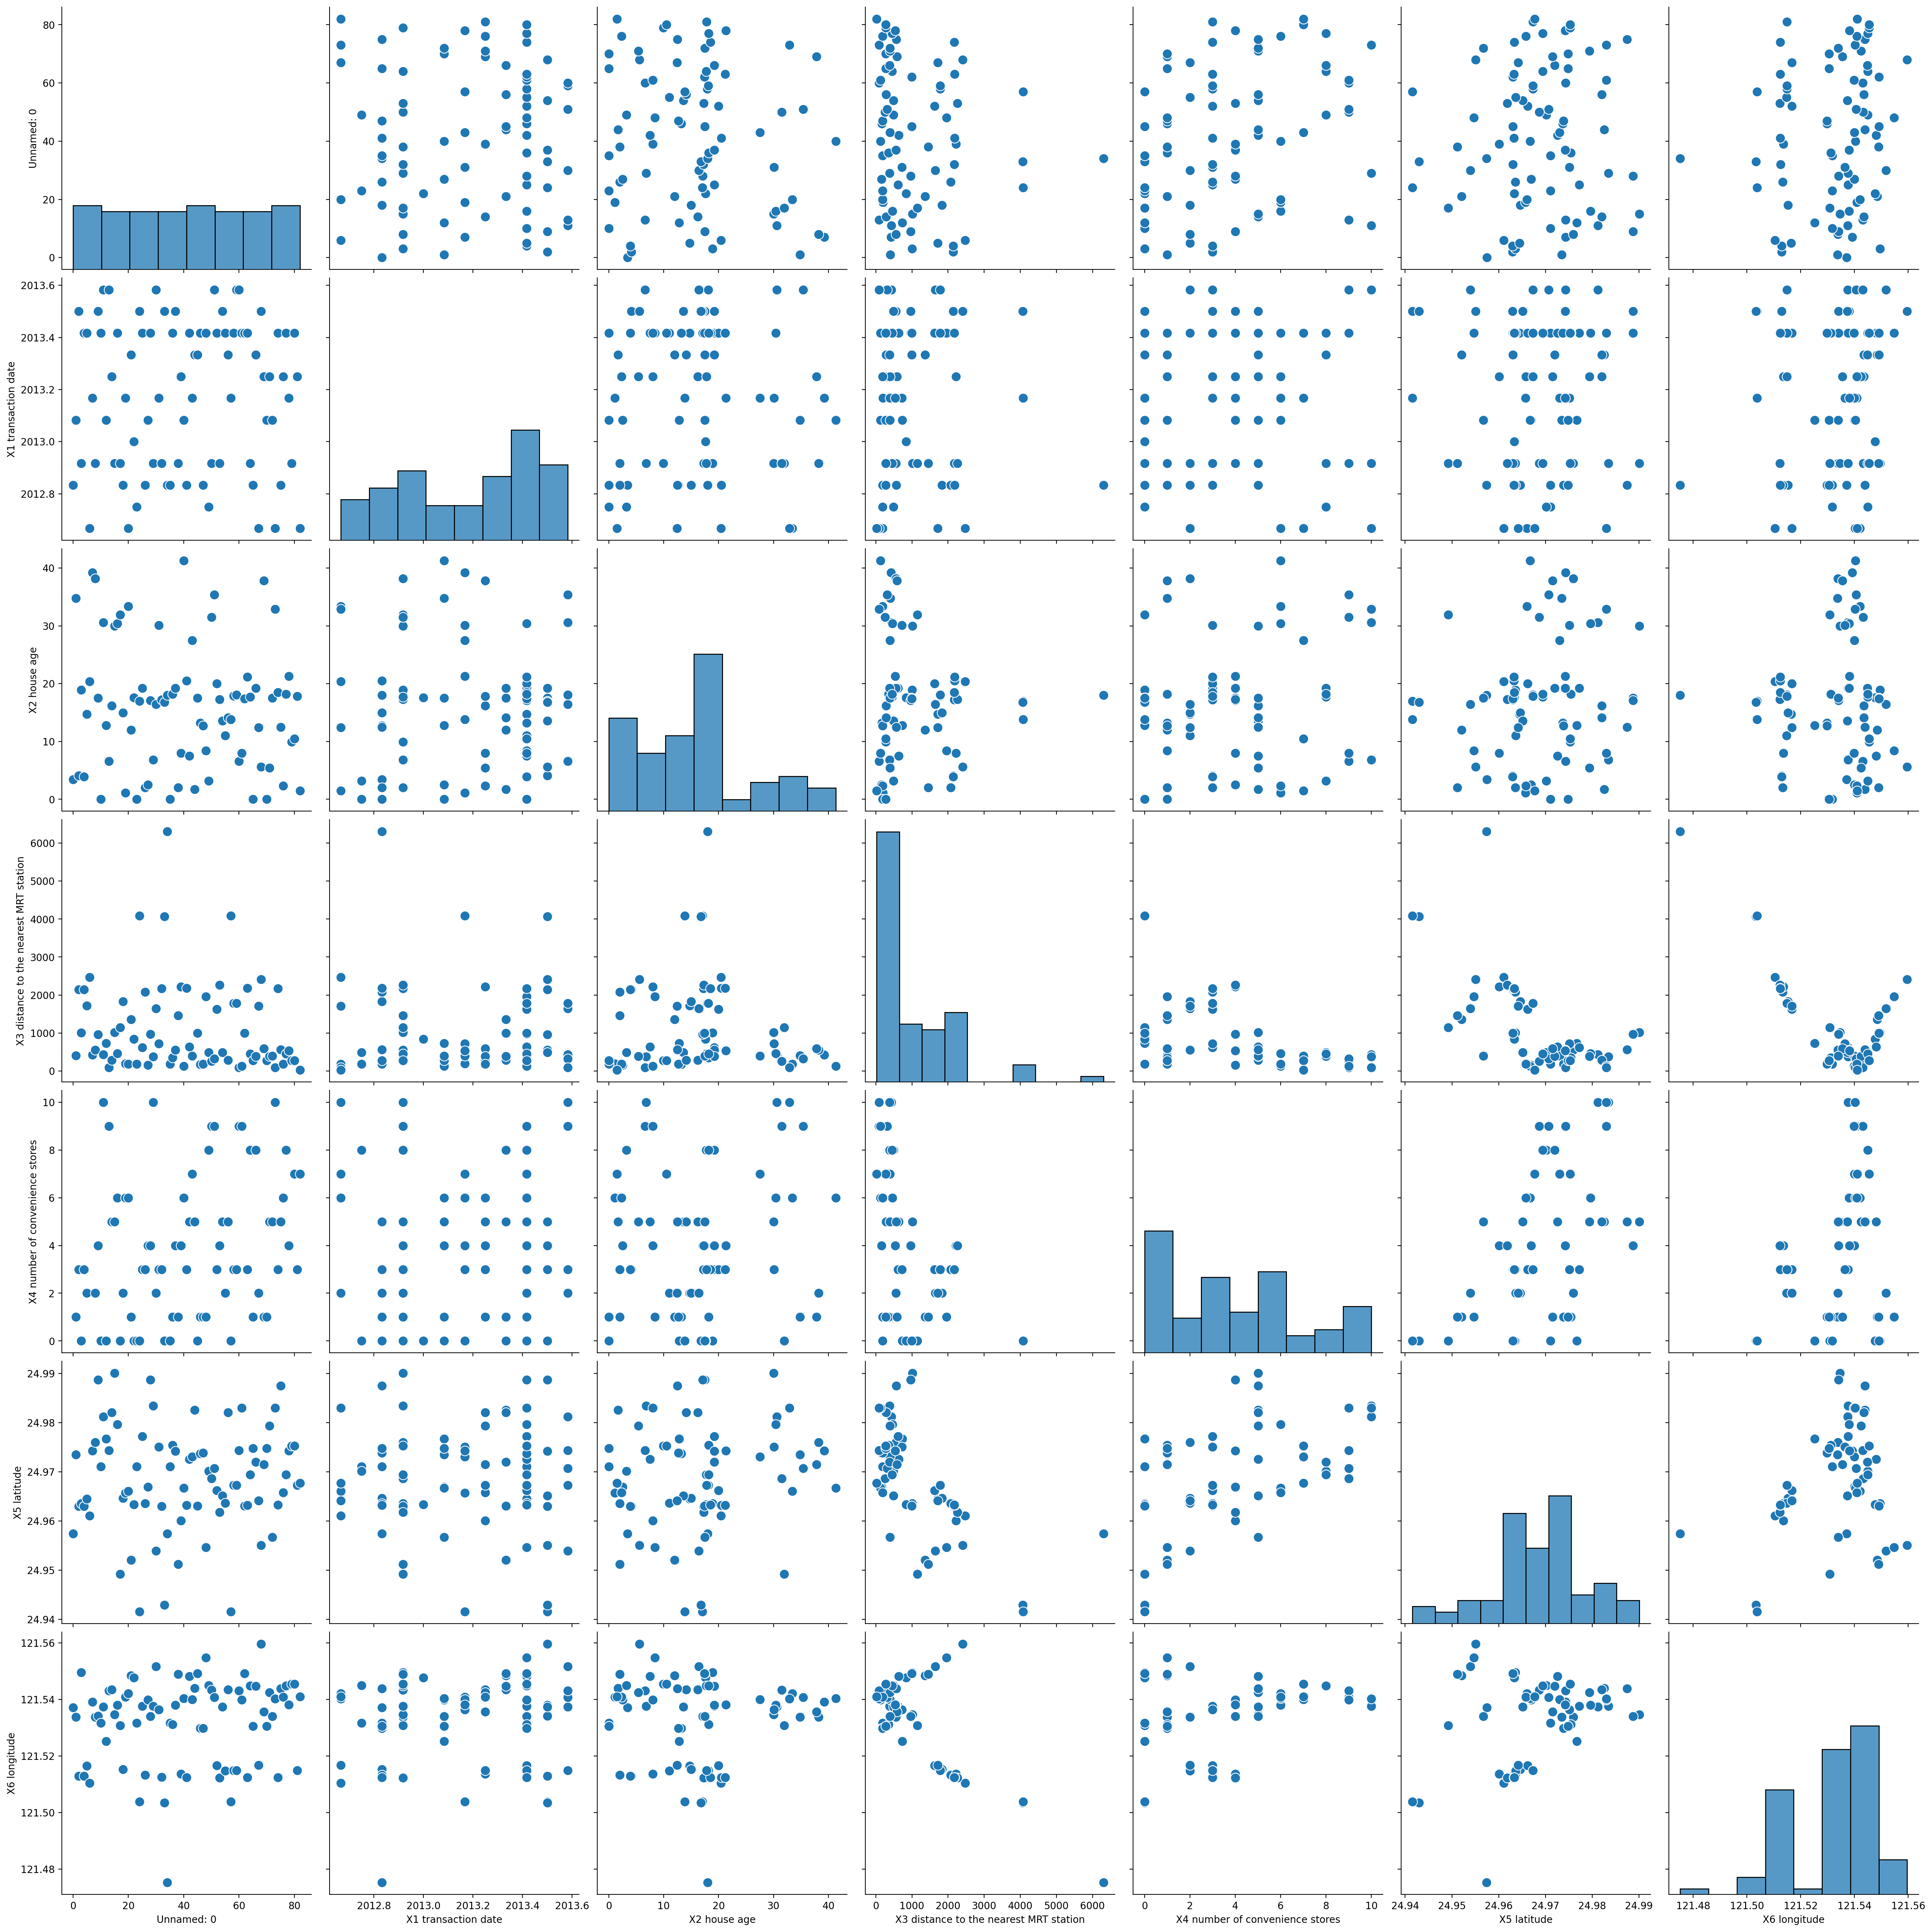

In [11]:
sns.pairplot(df, height=4,  
             plot_kws={'s': 100})


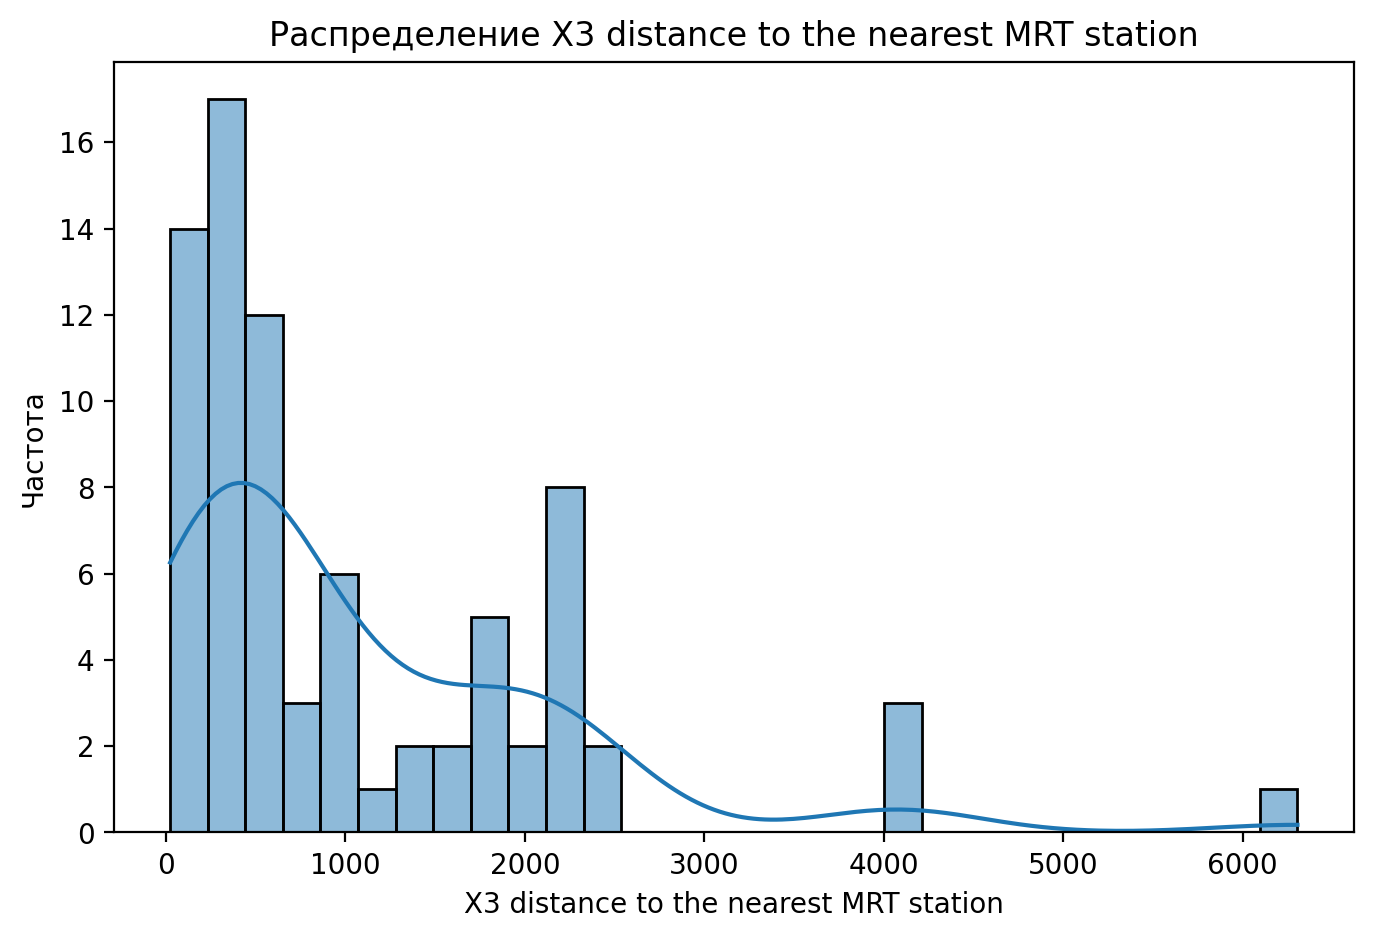

In [14]:
# Строим гистограмму Total Yield с разными цветами
plt.figure(figsize=(8, 5))
sns.histplot(df, x="X3 distance to the nearest MRT station", kde=True, bins=30)
plt.title("Распределение X3 distance to the nearest MRT station")
plt.xlabel("X3 distance to the nearest MRT station")
plt.ylabel("Частота")
plt.show()

In [17]:
df_log = df.copy()
df_log['X3 distance to the nearest MRT station'] = np.log(df_log['X3 distance to the nearest MRT station'])

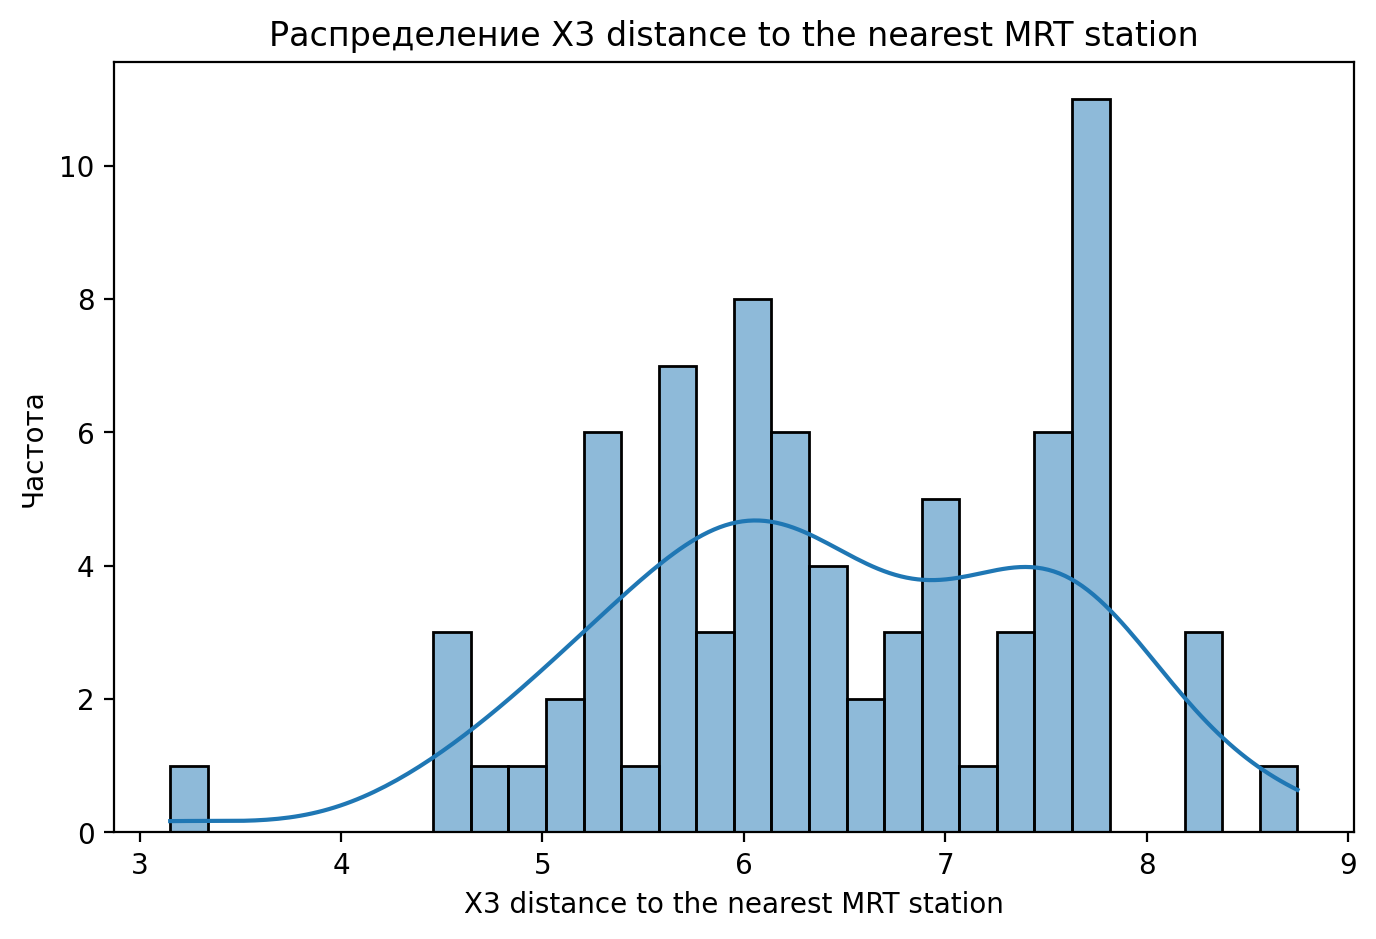

In [18]:
# Строим гистограмму Total Yield с разными цветами
plt.figure(figsize=(8, 5))
sns.histplot(df_log, x="X3 distance to the nearest MRT station", kde=True, bins=30)
plt.title("Распределение X3 distance to the nearest MRT station")
plt.xlabel("X3 distance to the nearest MRT station")
plt.ylabel("Частота")
plt.show()

In [ ]:
y = df['Unnamed: 0']
x_train, x_test = train_test_split()
y_train, y_test = train_test_split()